In [2]:
# this is Number Prediction from 0 to 9 using keras and tensorflow as backend services
import tensorflow as tf
mnist = tf.keras.datasets.mnist   # this is datasets provided by the mnist

In [4]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()  # this is here we downloding our dataset for doing operation on it.
X_train.shape, Y_train,X_test.shape,Y_test.shape

11493376/11490434 [==============================] - 89s 8us/step


((60000, 28, 28),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 (10000, 28, 28),
 (10000,))

In [15]:
X_train[0].shape  # (28, 28)
# lets normalize the data " this is easy to calculate the tensors. it will convert all the values between 0 to 1."
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

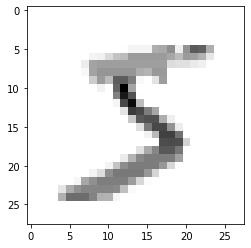

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap='binary')
plt.show()

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2649 - acc: 0.9213
Epoch 2/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1086 - acc: 0.9661
Epoch 3/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0744 - acc: 0.9764


In [20]:
#lets check our model is fit well or not
val_loss,val_acc = model.evaluate(X_test,Y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.0955 - acc: 0.9726
0.09549785977844148 0.9726


In [21]:
# lets save our trained model
model.save("number_recognizer.model")

In [23]:
# if you want to load trained model then simple
load_oldModel = tf.keras.models.load_model("number_recognizer.model")

In [30]:
# lets try to pridict how our trained model is working
predict = model.predict([X_test])
predict   # its just shows the array based on the probability

array([[8.3618296e-08, 1.1988643e-06, 1.4140044e-05, ..., 9.9998415e-01,
        8.6749741e-10, 7.2491325e-08],
       [3.6478807e-06, 1.4757302e-03, 9.9842960e-01, ..., 6.1851074e-06,
        7.3149099e-06, 2.9615962e-10],
       [1.0054362e-09, 9.9989092e-01, 1.2725436e-06, ..., 9.7637632e-05,
        5.5920095e-06, 1.4021976e-08],
       ...,
       [1.4187561e-09, 5.1894114e-07, 5.9852301e-09, ..., 2.9392703e-04,
        6.6856251e-06, 5.3147203e-05],
       [8.4757389e-08, 2.3520281e-06, 1.3767154e-09, ..., 2.2856882e-07,
        4.1438670e-05, 1.5939277e-07],
       [4.0818722e-06, 1.0710846e-06, 1.1096921e-06, ..., 2.8417801e-09,
        5.5787304e-08, 2.2823700e-07]], dtype=float32)

In [39]:
# lets make it prediction. 
import numpy as np
np.argmax(predict[8982])   # its means X_test[8982] image is 5, lets verify it


5

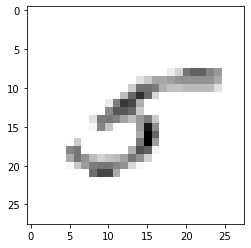

In [40]:
plt.imshow(X_test[8982],cmap="binary")
plt.show()